In [1]:
import pymatgen.apps.battery.analyzer as ans
import pymatgen.apps.battery.battery_abc as bat
import pymatgen.apps.battery.insertion_battery as ins
import pandas as pd
import numpy as np
import pymatgen
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
MAPI_KEY = 'P5KlMfFhCfKvXJBjNRq'
mpr = MPRester(MAPI_KEY)

In [3]:
def get_battery_data(self, formula_or_batt_id):
    return mpr._make_request('/battery/%s' % formula_or_batt_id)

In [4]:
MPRester.get_battery_data = get_battery_data

In [5]:
def get_bat_dat():
    all_bat_ids_list = (mpr._make_request('/battery/all_ids'))
    all_battery_dataframe = pd.DataFrame([])
    for batt_id in all_bat_ids_list:
        if (batt_id.__contains__('_Na')):
            
            result_bat_id = pd.DataFrame(mpr.get_battery_data(batt_id))
            adj_pairs = result_bat_id['adj_pairs']
            adj_pairs_list = list(adj_pairs)
            in_list = pd.DataFrame(list(adj_pairs_list[0]))
            max_d_vol = pd.DataFrame(in_list['max_delta_volume'])
            result_bat_id['Max Delta Volume'] = max_d_vol
            all_battery_dataframe = all_battery_dataframe.append(result_bat_id)

    all_battery_dataframe.rename(columns = {'battid':'Battery ID', 
                                            'reduced_cell_formula':'Reduced Cell Formula', 
                                            'average_voltage':'Average Voltage (V)', 
                                            'min_voltage':'Min Voltage (V)', 
                                            'max_voltage':'Max Voltage (V)', 
                                            'nsteps':'Number of Steps', 
                                            'min_instability':'Min Instability', 
                                            'capacity_grav':'Gravimetric Capacity (units)', 
                                            'capacity_vol':'Volumetric Capacity', 
                                            'working_ion':'Working Ion', 
                                            'min_frac':'Min Fraction', 
                                            'max_frac':'Max Fraction', 
                                            'reduced_cell_composition':'Reduced Cell Composition', 
                                            'framework':'Framework', 
                                            'adj_pairs':'Adjacent Pairs', 
                                            'spacegroup':'Spacegroup', 
                                            'energy_grav':'Gravemetric Energy (units)', 
                                            'energy_vol':'Volumetric Energy', 
                                            'numsites':'Number of Sites', 
                                            'type':'Type'}, inplace = True)
    
    clean_battery_df = all_battery_dataframe.set_index('Battery ID')
    return clean_battery_df

In [6]:
def BatteryDF(Ion):
    all_bat_ids_list = (mpr._make_request('/battery/all_ids'))
    all_battery_dataframe = pd.DataFrame([])
    for batt_id in all_bat_ids_list:
        if (batt_id.__contains__(str(Ion))):
            
            result_bat_id = pd.DataFrame(mpr.get_battery_data(batt_id))
            adj_pairs = result_bat_id['adj_pairs']
            adj_pairs_list = list(adj_pairs)
            in_list = pd.DataFrame(list(adj_pairs_list[0]))
            max_d_vol = pd.DataFrame(in_list['max_delta_volume'])
            result_bat_id['Max Delta Volume'] = max_d_vol
            all_battery_dataframe = all_battery_dataframe.append(result_bat_id)

    all_battery_dataframe.rename(columns = {'battid':'Battery ID', 
                                            'reduced_cell_formula':'Reduced Cell Formula', 
                                            'average_voltage':'Average Voltage (V)', 
                                            'min_voltage':'Min Voltage (V)', 
                                            'max_voltage':'Max Voltage (V)', 
                                            'nsteps':'Number of Steps', 
                                            'min_instability':'Min Instability', 
                                            'capacity_grav':'Gravimetric Capacity (units)', 
                                            'capacity_vol':'Volumetric Capacity', 
                                            'working_ion':'Working Ion', 
                                            'min_frac':'Min Fraction', 
                                            'max_frac':'Max Fraction', 
                                            'reduced_cell_composition':'Reduced Cell Composition', 
                                            'framework':'Framework', 
                                            'adj_pairs':'Adjacent Pairs', 
                                            'spacegroup':'Spacegroup', 
                                            'energy_grav':'Gravemetric Energy (units)', 
                                            'energy_vol':'Volumetric Energy', 
                                            'numsites':'Number of Sites', 
                                            'type':'Type'}, inplace = True)
    
    clean_battery_df = all_battery_dataframe.set_index('Battery ID')

In [7]:
df = get_bat_dat()

In [8]:
df.head()

,Reduced Cell Formula,Average Voltage (V),Min Voltage (V),Max Voltage (V),Number of Steps,Min Instability,Gravimetric Capacity (units),Volumetric Capacity,Working Ion,Min Fraction,Max Fraction,Reduced Cell Composition,Framework,Adjacent Pairs,Spacegroup,Gravemetric Energy (units),Volumetric Energy,Number of Sites,Type,Max Delta Volume
Battery ID,,,,,,,,,,,,,,,,,,,,
mp-1001833_Na,InBi,-1.798227,-1.798227,-1.798227,1,2.871562e-02,144.959872,58.997096,Na,0.000000,0.500000,"{'In': 1.0, 'Bi': 1.0}","{'reduced_cell_composition': {'In': 1.0, 'Bi':...","[{'average_voltage': -1.7982269649999998, 'max...","{'number': 216, 'hall_number': 512, 'internati...",-260.670751,-106.090168,2.0,intercalation,17.704725
mp-1002227_Na,RbSb,1.111756,1.111756,1.111756,1,1.367644e-02,211.695929,703.837878,Na,0.000000,0.500000,"{'Rb': 1.0, 'Sb': 1.0}","{'reduced_cell_composition': {'Rb': 1.0, 'Sb':...","[{'average_voltage': 1.1117560050000004, 'max_...","{'number': 225, 'hall_number': 523, 'internati...",235.354220,782.495988,2.0,intercalation,0.153716
mp-1002571_Na,MnO2,2.204685,1.898535,2.816984,2,1.982991e-03,182.859366,720.849704,Na,0.076923,0.250000,"{'Mn': 1.0, 'O': 2.0}","{'reduced_cell_composition': {'Mn': 1.0, 'O': ...","[{'average_voltage': 2.8169841949999985, 'max_...","{'number': 12, 'hall_number': 63, 'internation...",403.147262,1589.246373,3.0,intercalation,0.000353
mp-10033_Na,NbS2,1.804876,1.804876,1.804876,1,0.000000e+00,148.875491,610.926998,Na,0.000000,0.250000,"{'Nb': 1.0, 'S': 2.0}","{'reduced_cell_composition': {'Nb': 1.0, 'S': ...","[{'average_voltage': 1.8048755549999982, 'max_...","{'number': 194, 'hall_number': 488, 'internati...",268.701734,1102.647205,3.0,intercalation,0.122905
mp-1003635_Na,MnO2,2.389452,1.513881,3.680532,4,-1.776357e-15,136.142489,559.579265,Na,0.000000,0.142857,"{'Mn': 1.0, 'O': 2.0}","{'reduced_cell_composition': {'Mn': 1.0, 'O': ...","[{'average_voltage': 3.6805323150000175, 'max_...","{'number': 1, 'hall_number': 1, 'international...",325.306002,1337.088037,3.0,intercalation,0.007810


In [93]:
genergye = df['Gravemetric Energy (units)'].values
gcapacity = df['Gravimetric Capacity (units)'].values
callformula =  df['Reduced Cell Formula'].values
voltage = df['Average Voltage (V)'].values
index = df.index

In [94]:
data = {'Grav. Energy':genergye, 'Grav. Capacity':gcapacity, 'Voltage':voltage, 'Formula':callformula, 'Index':index }

In [95]:
new_df = pd.DataFrame(data)

In [96]:
new_df.head()

,Grav. Energy,Grav. Capacity,Voltage,Formula,Index
0,-260.670751,144.959872,-1.798227,InBi,mp-1001833_Na
1,235.354220,211.695929,1.111756,RbSb,mp-1002227_Na
2,403.147262,182.859366,2.204685,MnO2,mp-1002571_Na
3,268.701734,148.875491,1.804876,NbS2,mp-10033_Na
4,325.306002,136.142489,2.389452,MnO2,mp-1003635_Na


In [97]:
len(new_df)

328

In [98]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Grav. Energy    328 non-null    float64
 1   Grav. Capacity  328 non-null    float64
 2   Voltage         328 non-null    float64
 3   Formula         328 non-null    object 
 4   Index           328 non-null    object 
dtypes: float64(3), object(2)
memory usage: 12.9+ KB


In [99]:
new_df.isnull().sum()

Grav. Energy      0
Grav. Capacity    0
Voltage           0
Formula           0
Index             0
dtype: int64

In [100]:
not_unique = len(new_df['Formula'])- len(new_df['Formula'].unique())

In [101]:
not_unique

66

In [102]:
x = new_df.iloc[:,0:2]
y = new_df['Formula']

In [103]:
x

,Grav. Energy,Grav. Capacity
0,-260.670751,144.959872
1,235.354220,211.695929
2,403.147262,182.859366
3,268.701734,148.875491
4,325.306002,136.142489
...,...,...
323,460.655352,134.899518
324,269.593176,74.662307
325,517.770878,131.139280
326,387.912156,177.577257


In [104]:
label = LabelEncoder()
label.fit(y)

LabelEncoder()

In [105]:
y = label.transform(y)

In [106]:
y[0]

104

In [107]:
minmax = MinMaxScaler()
x = minmax.fit_transform(x)

In [108]:
columns = ['Grav. Energy', 'Grav. Capacity']

In [109]:
columns

['Grav. Energy', 'Grav. Capacity']

In [110]:
minmax = MinMaxScaler()
x = minmax.fit_transform(x)

In [111]:
x = pd.DataFrame(x, columns=[columns])

In [112]:
x.head()

,Grav. Energy,Grav. Capacity
0,0.169951,0.215029
1,0.462655,0.319961
2,0.561670,0.274620
3,0.482333,0.221185
4,0.515736,0.201164


In [113]:
import matplotlib.pyplot as plt

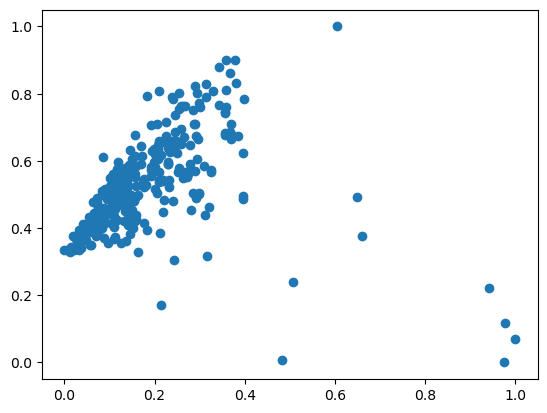

In [114]:
plt.scatter(x['Grav. Capacity'], x['Grav. Energy'])

/home/marioneto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/marioneto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/marioneto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/marioneto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/hom

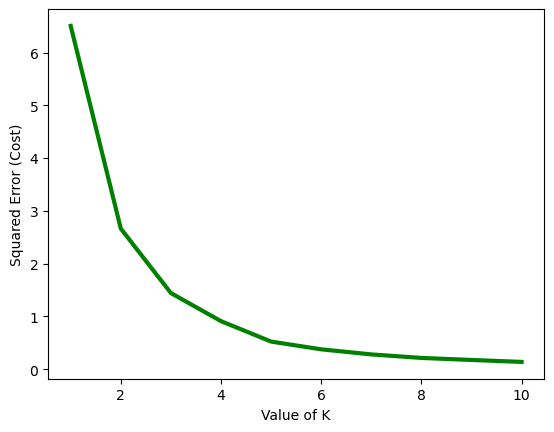

In [115]:
#Elbow Method
cost = []
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(x['Grav. Energy'])
    cost.append(KM.inertia_)    
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

In [116]:
Kmean= KMeans(n_clusters=3, init='k-means++', random_state=42)
y = Kmean.fit_predict(x)

/home/marioneto/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [117]:
from sklearn.metrics import silhouette_score 
score = silhouette_score(x,y)
print(score)

0.5163019920599531


In [118]:
#plt.scatter(y, x['Grav. Capacity'], c=Kmean.labels_, cmap='rainbow')
new_df['Cluster'] = y

In [119]:
unique_labels = new_df["Cluster"].unique()

In [120]:
unique_labels

array([1, 0, 2], dtype=int32)

In [121]:
import seaborn as sns

In [122]:
unique_labels

array([1, 0, 2], dtype=int32)

In [123]:
cl0 =  new_df[new_df.Cluster==unique_labels[1]]
cl1 = new_df[new_df.Cluster==unique_labels[0]]
#cl2 = new_df[new_df.Cluster==unique_labels[2]]
#cl3 = new_df[new_df.Cluster==unique_labels[4]]
#cl4 = new_df[new_df.Cluster==unique_labels[0]]

In [124]:
cl0.to_csv('HighestCluserMaterial.csv')

In [125]:
#cl0['Grav. Energy'].idxmax()
max_row = cl0.loc[cl0['Grav. Energy'].idxmax()]

In [126]:
max_row

Grav. Energy      1145.953961
Grav. Capacity     392.202245
Voltage              2.921844
Formula                  NiO2
Index             mp-25599_Na
Cluster                     0
Name: 169, dtype: object

In [127]:
from matplotlib.colors import ListedColormap

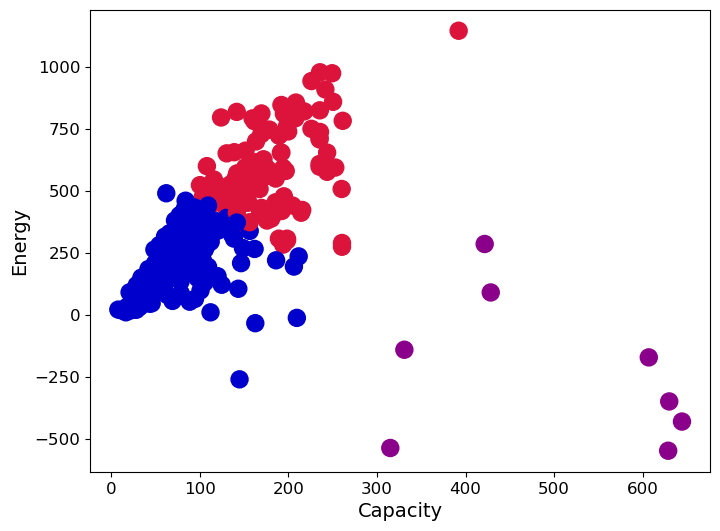

In [128]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=new_df['Grav. Capacity'], y=new_df['Grav. Energy'], s=150,
            c=new_df['Cluster'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'Capacity', fontsize=14)
ax.set_ylabel(r'Energy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()